Предсказать сорт винограда из которого сделано вино, используя результаты химических анализов (описание данных), c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [45]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score

Разделяем данные на признаки и классы

In [46]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header =None)
grade = data[0]
attribute = data.loc[:, 1:]

Создаем генератор разбиения,задающий набор на обучение и валидацию

In [47]:
kf =KFold(len(attribute), shuffle=True, random_state=42)

Решаем задачу для трех метрик:евклидова,манхеттенская,чебышева

In [48]:
mean_scores = [[],[],[]]
metric_names = ['euclidean','manhattan','chebyshev'] 

Производим кросс-валидацию по блокам.Вычисляем качество на всех разбиениях,используя долю ответов в качестве меры качества.

In [49]:
for i in range(3):
    for k in range(1,30):
        knn = KNeighborsClassifier(n_neighbors=k,metric=metric_names[i])
        scores = cross_val_score(knn, attribute, grade, cv=kf, scoring='accuracy')
        mean_scores[i].append(1-scores.mean())

Строим график,по которому видно что минимум для всех метрик достигается при k ~ 1

<function matplotlib.pyplot.show>

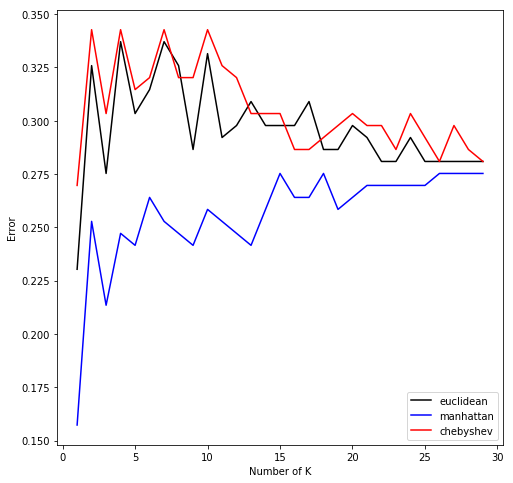

In [50]:
colors = ['black', 'blue', 'red']
plt.figure(figsize=(8, 8))
for i in range(3):
    plt.plot(range(1,30), mean_scores[i],color=colors[i],label=metric_names[i])
plt.xlabel('Number of K')
plt.ylabel('Error')
plt.legend(loc='lower right')
plt.show

In [51]:
from sklearn.model_selection import train_test_split

Зависимость значения ошибки и его стандартного отклонения от объема выборки на обучении и контроле.

In [53]:
std_arr = []
err_arr = []
for size in np.linspace(0.1, 0.8):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(grade, attribute, test_size=size, random_state=42)
    clf = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
    clf.fit(y_train, X_train)
    y_pred = clf.predict(y_test)
    err_arr.append((y_pred != X_test).sum())
    std_arr.append(np.std(y_pred != X_test))

Text(0,0.5,'errors')

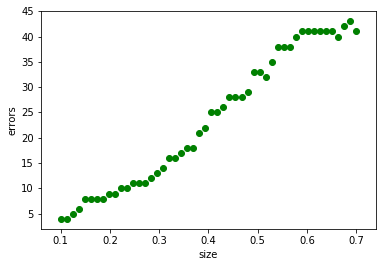

In [54]:
plt.scatter(np.linspace(0.1, 0.7), err_arr, color='green')
plt.xlabel('size')
plt.ylabel('errors')

Text(0,0.5,'errors')

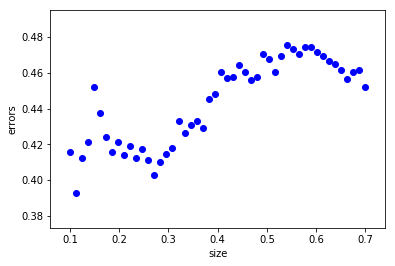

In [55]:
plt.scatter(np.linspace(0.1, 0.7), std_arr, color='blue')
plt.xlabel('size')
plt.ylabel('errors')